In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
messages = pd.read_csv("SMSSpamCollection", sep="\t", names=["label","Message"])

In [3]:
messages.head()

,label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
messages.describe()

,label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
messages.groupby("label").describe()

Message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
messages["Message"][4]

"Nah I don't think he goes to usf, he lives around here though"

In [7]:
messages["Length"] = messages["Message"].apply(len)

In [8]:
messages

,label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


<Axes: ylabel='Frequency'>

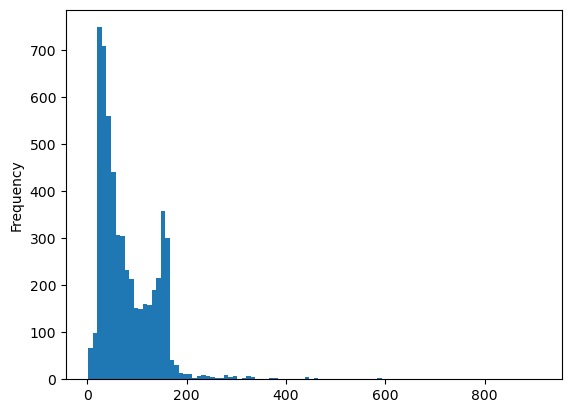

In [9]:
messages["Length"].plot.hist(bins=100)

In [10]:
messages["Length"].max()

910

In [11]:
messages[messages["Length"]==910]["Message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [12]:
messages.sort_values("Length",ascending=False).head(10)

,label,Message,Length
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
2849,ham,Sad story of a Man - Last week was my b'day. M...,588
2380,ham,"Good evening Sir, hope you are having a nice d...",482
3017,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1513,ham,"Hey sweet, I was wondering when you had a mome...",458
5104,ham,A Boy loved a gal. He propsd bt she didnt mind...,446


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

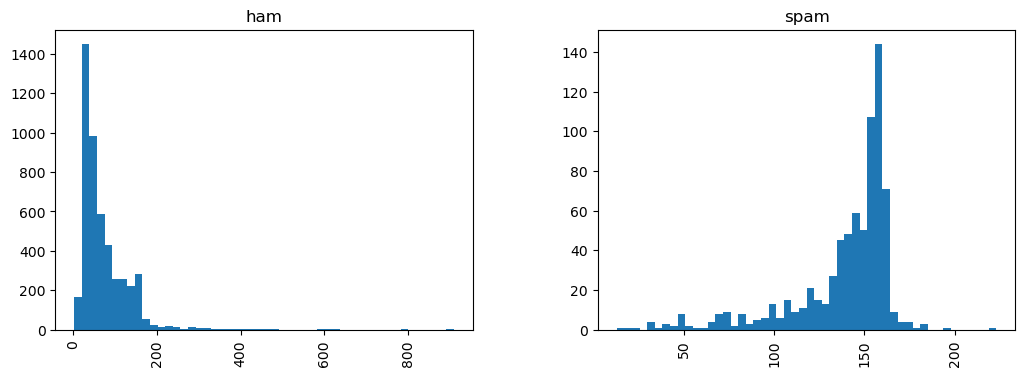

In [13]:
messages.hist(column="Length", bins=50, by="label", figsize=(12,4))

In [14]:
import string

In [15]:
mess = "Sample message! Notice: it has punctuation."

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
nopunc = [c for c in mess if c not in string.punctuation]

In [18]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [19]:
from nltk.corpus import stopwords

In [20]:
nopunc = "".join(nopunc)

In [21]:
nopunc = nopunc.split()

In [22]:
clean_mess = [word for word in nopunc if word.lower() not in stopwords.words("english")]

In [23]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [29]:
def transformText(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
   

In [25]:
transformText(messages["Message"][0])

'Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat'

In [26]:
messages["Message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [30]:
messages["Message"].head(5).apply(transformText)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
bow_transformer = CountVectorizer(analyzer=transformText).fit(messages["Message"])

In [33]:
print(len(bow_transformer.vocabulary_))

11425


In [34]:
message4 = messages['Message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [35]:
bow4  = bow_transformer.transform([message4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [36]:
print(bow_transformer.get_feature_names_out()[4068])

U


In [37]:
bow4 = bow_transformer.transform([message4])

In [38]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [41]:
print(bow4.shape)

(1, 11425)


In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
bow5 = bow_transformer.transform(messages["Message"])

In [44]:
tfidf_transformer = TfidfTransformer().fit(bow5)
tfdif5 = tfidf_transformer.transform(bow5)

In [45]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_["u"]])

3.2800524267409408


In [47]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_["ok"]])

4.863514852771781


In [48]:
from sklearn.naive_bayes import MultinomialNB

In [49]:
spam_detect_model = MultinomialNB().fit(tfdif5, messages["label"])

In [50]:
spam_detect_model.predict(tfdif5)[0]

'ham'

In [51]:
messages["label"][3]

'ham'

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
mess_train, Mess_test, label_train, label_test = train_test_split(messages["Message"], messages["label"], test_size=0.3)

In [54]:
label_test

3672     ham
518     spam
5159     ham
4213    spam
1066     ham
        ... 
2130     ham
2375     ham
4822     ham
1401     ham
1039     ham
Name: label, Length: 1672, dtype: object